In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


In [5]:
# Database configuration
db_config = {
    'host': 'localhost',
    'port': '5432',
    'name': 'tickvah_banks_ads',
    'user': 'postgres',
    'password': 'ocho'
}

In [3]:

# Function to create database engine
def create_db_engine(db_config):
    db_url = f'postgresql://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["name"]}'
    engine = create_engine(db_url)
    return engine

# Function to load data from the database
def load_data(engine):
    ads_data = pd.read_sql('SELECT * FROM tikvah_ads', engine)
    reviews_data = pd.read_sql('SELECT * FROM google_play_reviews', engine)
    return ads_data, reviews_data


In [21]:
# Function for data summarization and quality assessment
def data_summary(ads_data, reviews_data):
    print("Ads Data Summary:")
    print(ads_data.describe())
    print(ads_data.head(5))
    print("\nReviews Data Summary:")
    print(reviews_data.describe())
   

In [7]:
# Function for univariate analysis
def univariate_analysis(ads_data):
    plt.figure(figsize=(10, 6))
    sns.histplot(ads_data['View'], bins=30, kde=True)
    plt.title('Distribution of Ad View Counts')
    plt.xlabel('View Count')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=ads_data, x='View')
    plt.title('Box Plot of Ad View Counts')
    plt.xlabel('View Count')
    plt.show()

In [9]:


# Function for bivariate/multivariate analysis
def bivariate_analysis(ads_data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=ads_data, x='post_date', y='View', hue='time_of_day')
    plt.title('Ad View Counts by Post Date and Time of Day')
    plt.xlabel('Post Date')
    plt.ylabel('View Count')
    plt.show()

    plt.figure(figsize=(10, 6))
    numeric_cols = ads_data.select_dtypes(include=[np.number]).columns
    sns.heatmap(ads_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Ads Data')
    plt.show()

In [10]:
# Function to enrich data by merging datasets
def merge_data(ads_data, reviews_data):
    merged_data = ads_data.merge(reviews_data, left_on='post_date', right_on='at', how='inner')
    return merged_data

In [11]:
# Function for trend analysis
def trend_analysis(ads_data):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=ads_data, x='post_date', y='View')
    plt.title('Trend of Ad View Counts Over Time')
    plt.xlabel('Post Date')
    plt.ylabel('View Count')
    plt.show()

In [12]:
# Function to visualize key insights
def visualize_key_insights(ads_data):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=ads_data, x='time_of_day', y='View')
    plt.title('Ad View Counts by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('View Count')
    plt.show()


In [13]:

# Function for outlier detection and visualization
def outlier_detection(ads_data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=ads_data, x='View')
    plt.title('Box Plot of Ad View Counts')
    plt.xlabel('View Count')
    plt.show()

In [14]:

# Function for additional creative visualizations
def additional_visualizations(ads_data, reviews_data):
    ads_data['day_of_week'] = ads_data['post_date'].dt.day_name()
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=ads_data, x='day_of_week', y='View')
    plt.title('Ad View Counts by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('View Count')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(reviews_data['score'], bins=5, kde=True)
    plt.title('Distribution of Review Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=reviews_data, x='score', y='thumbsUp')
    plt.title('Review Score vs. Thumbs Up')
    plt.xlabel('Score')
    plt.ylabel('Thumbs Up')
    plt.show()

In [17]:
# Main function to run the analysis
def run_analysis():
    engine = create_db_engine(db_config)
    ads_data, reviews_data = load_data(engine)
    
    data_summary(ads_data, reviews_data)
    univariate_analysis(ads_data)
    bivariate_analysis(ads_data)
    
    merged_data = merge_data(ads_data, reviews_data)
    
    trend_analysis(ads_data)
    visualize_key_insights(ads_data)
    outlier_detection(ads_data)
    additional_visualizations(ads_data, reviews_data)

Ads Data Summary:
                View                      post_date
count      42.000000                             42
mean   226880.952381  2022-05-17 20:34:17.142857216
min    129400.000000            2018-05-23 00:00:00
25%    212300.000000            2022-01-20 00:00:00
50%    232100.000000            2022-03-17 00:00:00
75%    255900.000000            2023-05-09 00:00:00
max    299100.000000            2023-09-26 00:00:00
std     38830.144426                            NaN
                  Date                          Post link    View Post Hour  \
0            26/9/2023  https://t.me/tikvahethiopia/81734  239800  10:18:00   
1            19/9/2023  https://t.me/tikvahethiopia/81606  258400  06:53:00   
2            15/9/2023  https://t.me/tikvahethiopia/81502  269400  03:56:00   
3  2023-08-09 00:00:00  https://t.me/tikvahethiopia/81338  219400  10:50:00   
4  2023-05-09 00:00:00  https://t.me/tikvahethiopia/81252  255900  01:19:00   

  Bank Time of day  post_date time_of_d

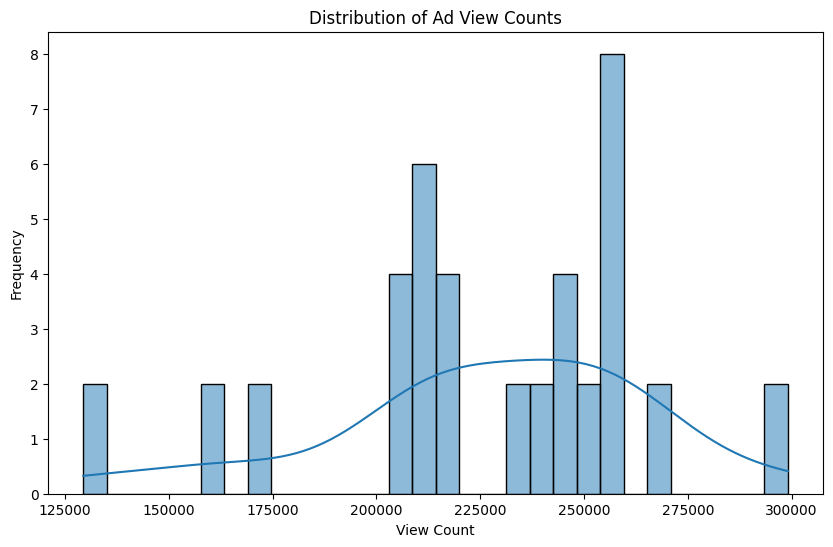

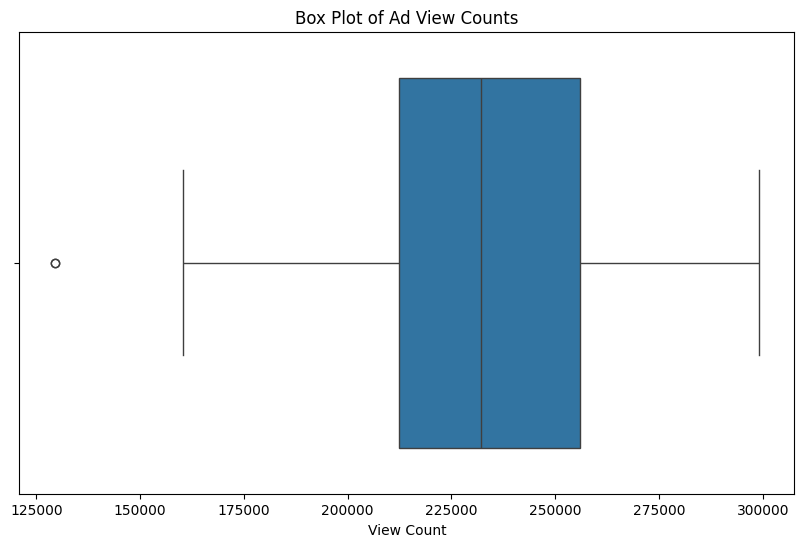

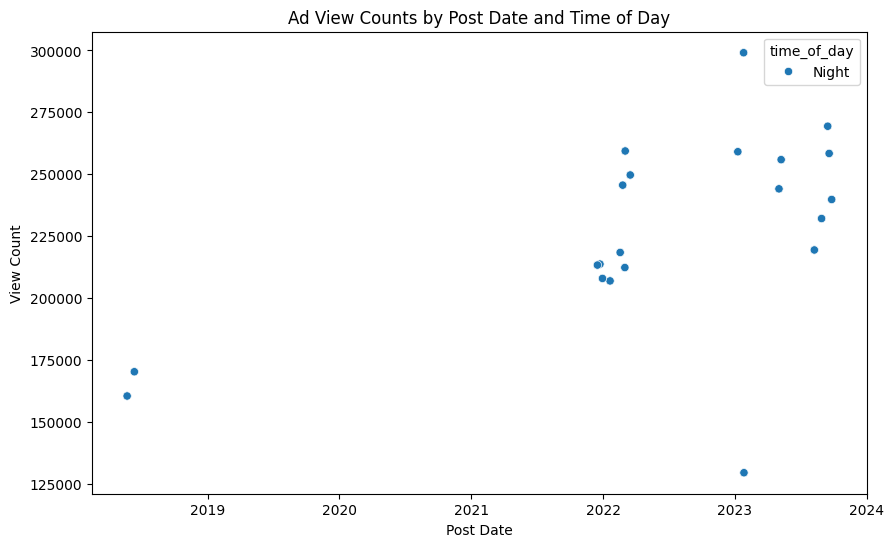

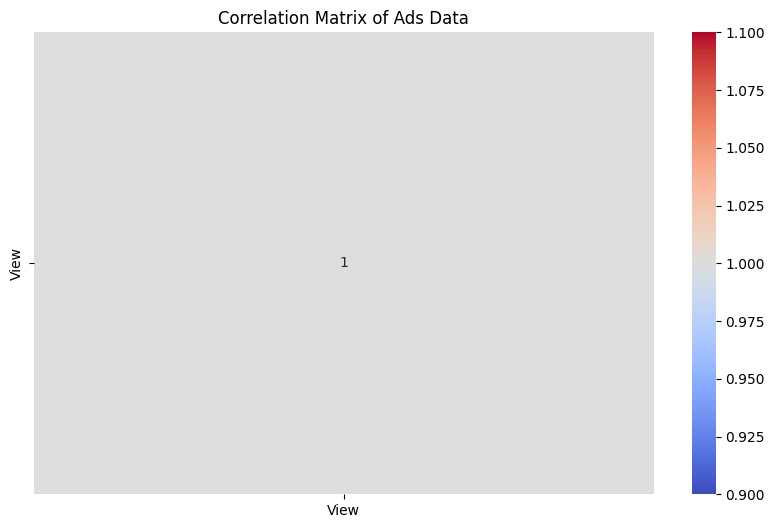

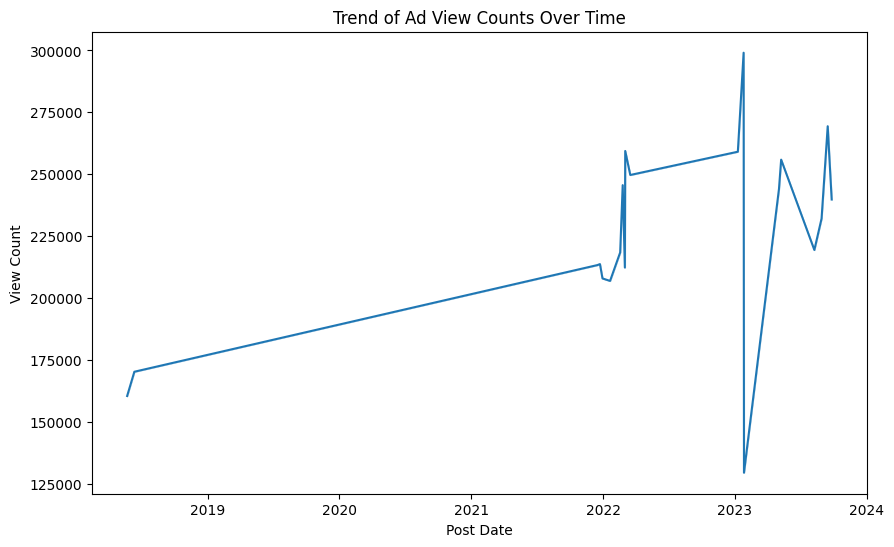

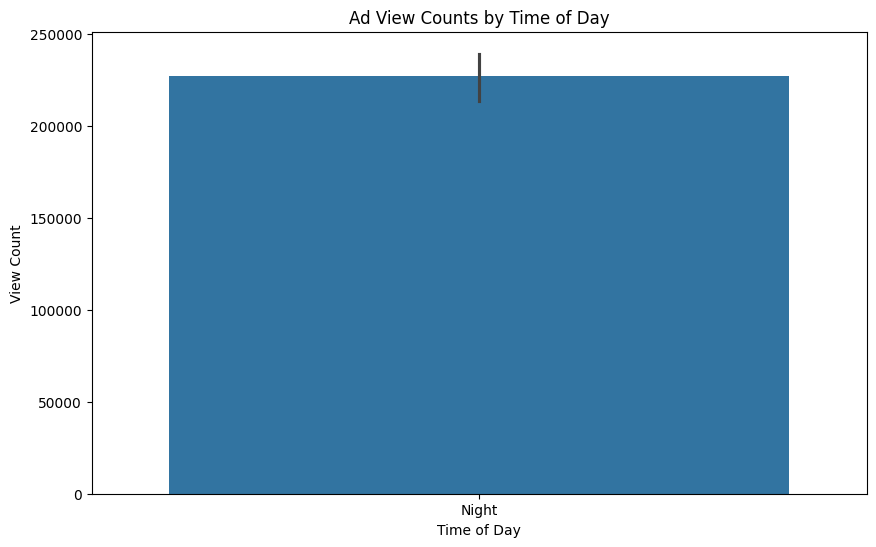

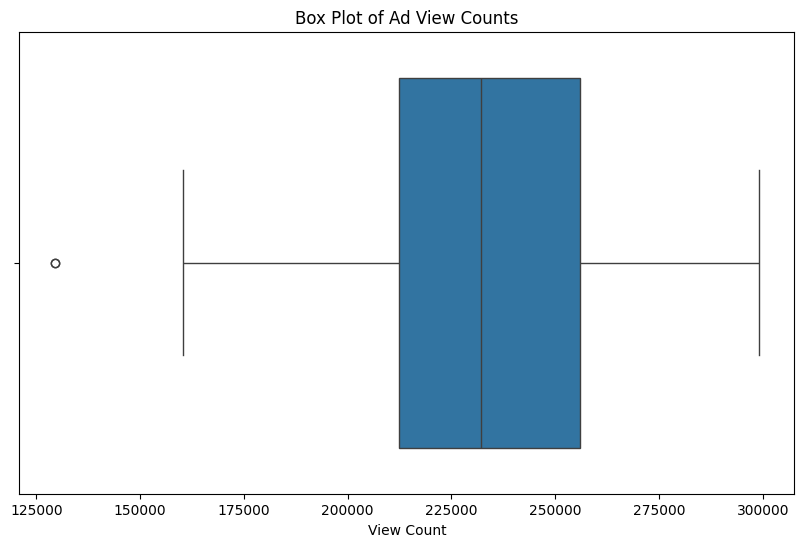

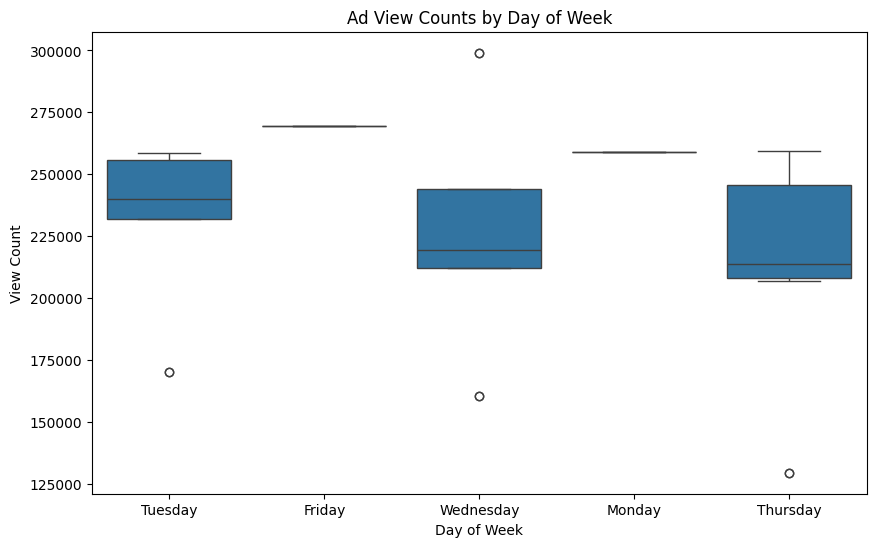

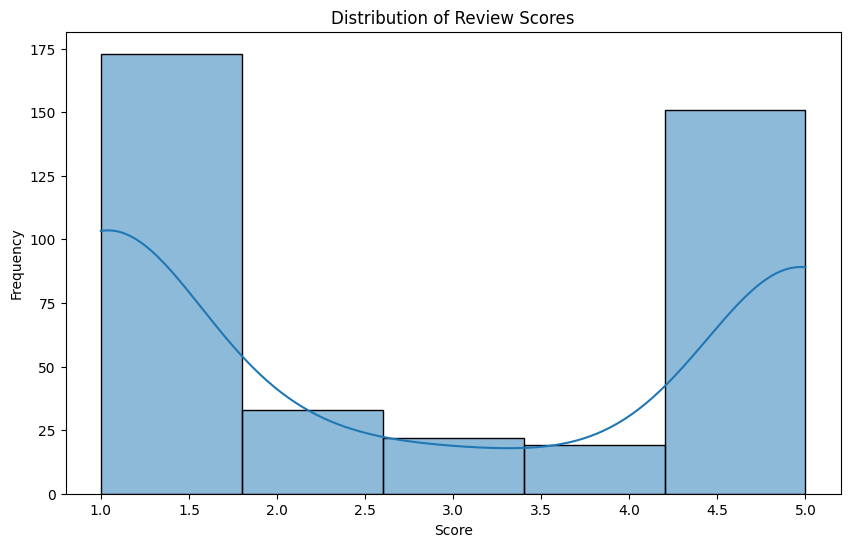

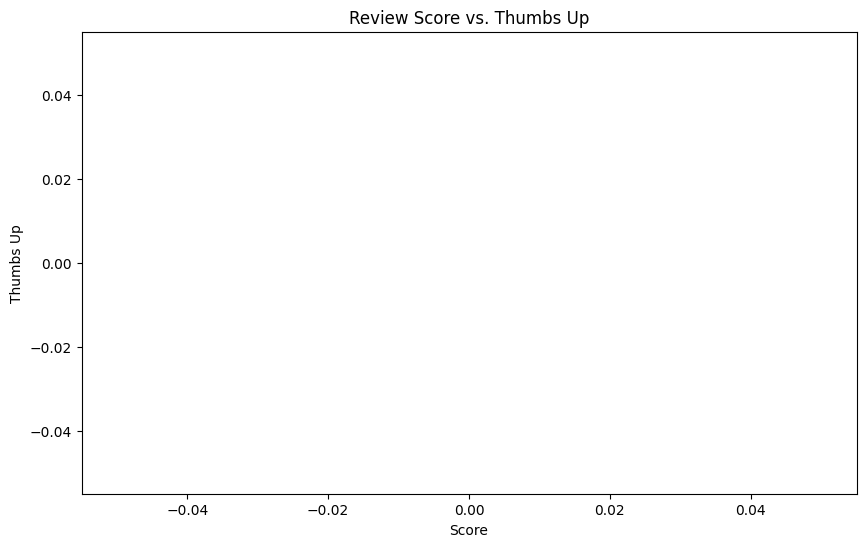

In [22]:



# Run the analysis
if __name__ == "__main__":
    run_analysis()
